# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Adriano Khairur Rizky Setyawan
- **Email:** wedoung87@gmail.com
- **ID Dicoding:** m_adriano_krs_76

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa banyak **presentase** pelanggan 'registered' dan 'casual'?
- Pertanyaan 2: Pada jam berapa **intensitas** penyewaan sepeda yang paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Mengimport dataset 1(day) dan 2(hour)
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Assessing Data

In [3]:
# Memeriksa tipe data data dari tiap kolom.
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Sebagian besar dari kolom pada kedua dataset sudah memiliki tipe data yang benar, hanya kolom 'dteday' saja yang perlu diubah menjadi format datetime

In [4]:
# Mencari missing value dataset day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Mencari missing value dataset hour
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value dalam dataset day dan hour

In [6]:
# Mencari data duplikat pada dataset day
day_df.duplicated().sum()

0

In [7]:
# Mencari data duplikat pada dataset hour
hour_df.duplicated().sum()

0

Tidak ada data yang terduplikasi dalam dataset day dan hour

### Cleaning Data

In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah jenis dataset pada kolom 'dteday' untuk kedua dataset menjadi format datetime atau tanggal

In [9]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns = {'yr':'year','mnth':'month','cnt':'count'}, inplace=True)

# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns = {'yr':'year','hr':'hour','mnth':'month','cnt':'count'}, inplace=True)

# Konversi nilai pada kolom year dalam kedua dataset
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

## Exploratory Data Analysis (EDA)

### Explore data terkait pertanyaan 1

In [10]:
# Memeriksa parameter statistik pada dataset day
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,NaN,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,NaN,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,NaN,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,NaN,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,NaN,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Melihat jumlah penyewaan tiap tahun berdasarkan registered dan casual
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


### Explore data terkait pertanyaan 2

In [12]:
# Memeriksa parameter statistik pada dataset hour
hour_df.describe(include="all")

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,NaN,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,NaN,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,NaN,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,NaN,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,NaN,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
# Melakukan clustering
cluster = hour_df.groupby(['hour']).agg({
    'count':'sum'
}).reset_index()
cluster

,hour,count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


## Visualization & Explanatory Analysis

### Pertanyaan 1:

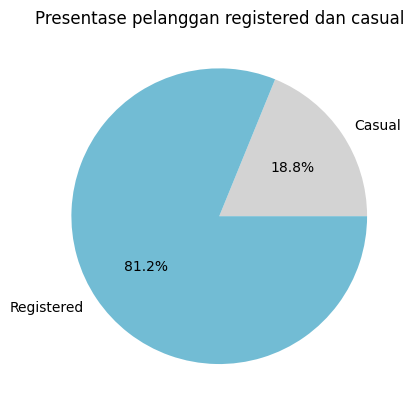

In [14]:
# Menjumlahkan data pada kolom casual dan registered
total_casual = sum(day_df['casual'])
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.title('Presentase pelanggan registered dan casual')
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

Plot diatas menunjukkan presentase pelanggan registered dan casual yang telah menyewa sepeda.

Presentase pelanggan yang sudah terdaftar atau 'registered' adalah sebesar 81.2% sedangkan persentase pengguna yang belum terdaftar atau 'casual' sebesar 18.8%.

### Pertanyaan 2:

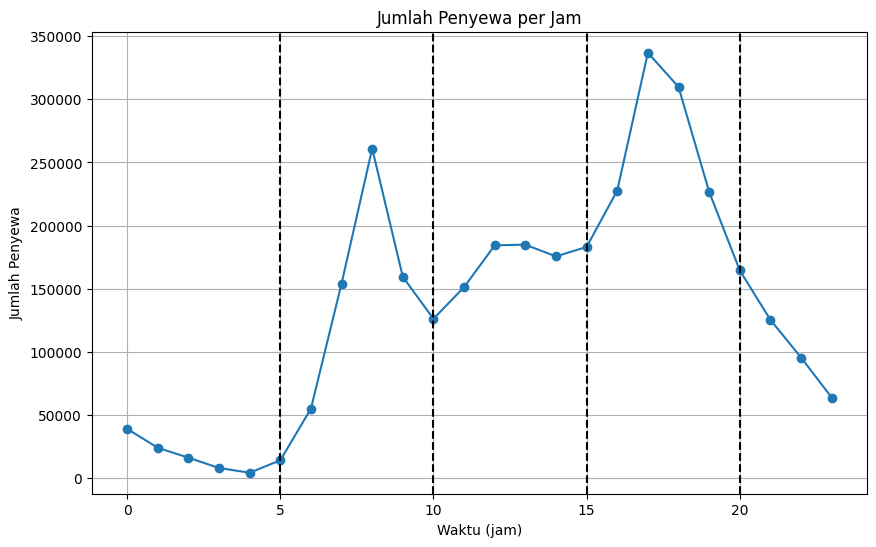

In [15]:
# Plot jumlah penyewa per jam
plt.figure(figsize=(10, 6))
plt.plot(cluster['hour'], cluster['count'], marker='o')
plt.title('Jumlah Penyewa per Jam')
plt.xlabel('Waktu (jam)')
plt.ylabel('Jumlah Penyewa')
plt.grid(True)

# Menambahkan garis vertikal putus-putus di jam 5, 10, 15, dan 20
plt.axvline(x=5, linestyle='--', color='black')
plt.axvline(x=10, linestyle='--', color='black')
plt.axvline(x=15, linestyle='--', color='black')
plt.axvline(x=20, linestyle='--', color='black')

plt.show()

Plot di atas adalah klasterisasi sederhana untuk membagi jam pelayanan Bike Sharing dalam beberapa kategori. Kategori yang digunakan adalah:

- Jam sepi pengguna; Jam 0 atau 12 malam hingga jam 5 pagi
- Jam sedang pengguna; Setelah jam 10 hingga 3 sore, lalu diikuti oleh jam 8 malam hingga sebelum jam 12 malam.
- Jam ramai pengguna; Untuk jam sedang pengguna dari tabel diatas adalah jetelah jam 5 hingga jam 10 pagi, lalu diikuti oleh jam 3 sore hingga sebelum jam 8 malam.

Asumsi yang bisa diambil dari klasterisasi tersebut adalah bahwa Bike Sharing ramai pengguna pada jam berangkat kerja dan saat pulang kerja. Pada siang hari, pengguna cenderung "standar" atau tidak terlalu ramai. Sedangkan pada saat larut malam hingga pagi saat masih istirahat, pengguna sangat sedikit.

Dari hasil tersebut dapat diketahui bahwa intensitas penyewaan sepeda paling tinggi adalah pada jam 17 (5 sore) sedangkan intensitas paling rendahnya adalah pada jam 4 pagi.

## Conclusion

- Pertanyaan 1: Pelanggan yang sudah registered sebanyak **81.2%** sedangkan pelanggan yang belum melakukan register (casual) sebanyak **18.8%**.
- Pertanyaan 2: Intensitas penyewaan sepeda paling tinggi adalah pada **jam 17 (5 sore)** sedangkan intensitas paling rendahnya adalah pada **jam 4 pagi**.